In [1]:
import seaborn as sns

import os
import torch

from torch.distributions.categorical import Categorical
from models.dcgan import Generator as DcganGenerator
from models.biggan.BigGAN import Generator as BigGanGenerator

from utils.utils import visualize

sns.set(font_scale=1.3)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# DCGAN

In [2]:
dcgan_generator = DcganGenerator(100, 64).to(device)
dcgan_generator.load_state_dict(torch.load('./saved_models/DCGAN/generator.pth'))
dcgan_generator.eval();

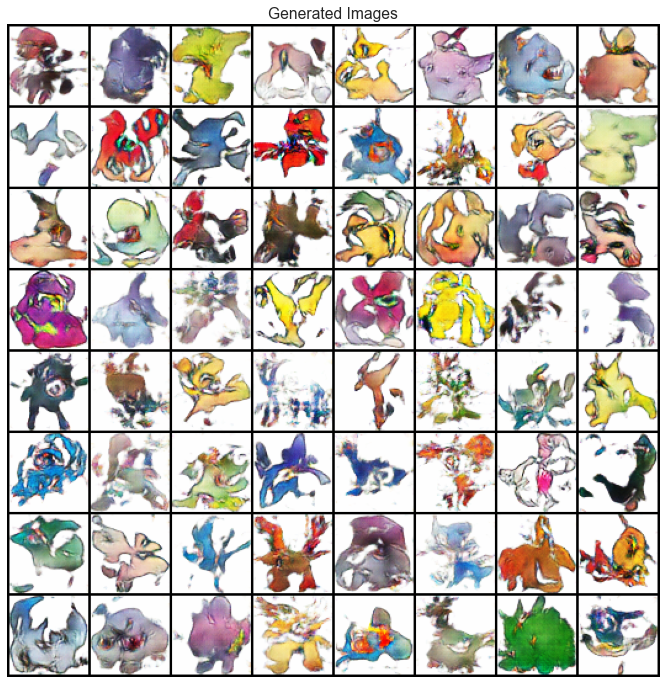

In [3]:
batch = dcgan_generator(torch.randn(128, dcgan_generator.lvs, 1, 1, device=device))
visualize(batch, 'Generated Images')

[Веса](https://drive.google.com/file/d/1E-Jv-pemPfLmmhkZ_pQ2QqN2azU67hIy/view?usp=sharing)

# BigGAN

In [2]:
biggan_generator = BigGanGenerator(**torch.load('./saved_models/BigGAN/config.pth')).to(device)
biggan_generator.load_state_dict(torch.load('./saved_models/BigGAN/generator.pth'))
biggan_generator.eval();

Adding attention layer in G at resolution 64
Param count for Gs initialized parameters: 70420739


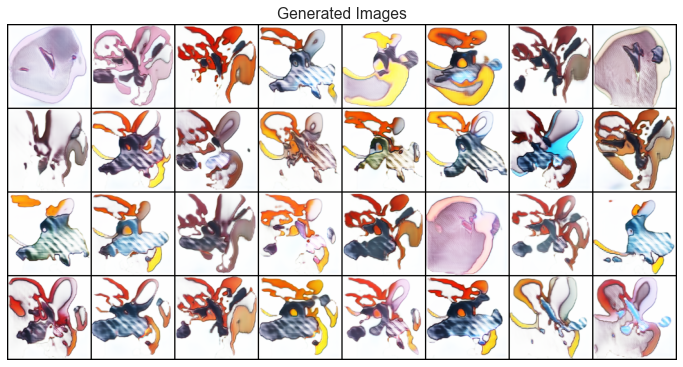

In [5]:
n_classes = len(os.listdir('images'))

batch = []
for i in range(4):
    real_labels = Categorical(torch.tensor([1 / n_classes] * n_classes)).sample([8]).to(device)
    batch.append(biggan_generator(torch.randn(8, 128, device=device), biggan_generator.shared(real_labels)))
visualize(torch.cat(batch), 'Generated Images')

Уже лучше. При должной фантазии даже можно увидеть покемонов. По сравнению с DCGAN качество генерируемых картинок гораздо выше (лучше разрешение, как минимум). Уверен, что можно улучшить результаты за счет подбора гиперпараметров, но для этого необходимы мощные вычислительные ресурсы и время.

* [Config](https://drive.google.com/file/d/1oRQjZusBNbp4OVfaVA2GMWSMXiGajEAb/view?usp=sharing)
* [Веса](https://drive.google.com/file/d/1ypbi_QrbM4l-rDhR40mntBmyEFazEQE4/view?usp=sharing)

### The Best Pokemons:  

|||||
|-|-|-|-|
| 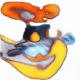 | 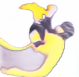 | 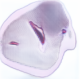 | 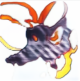 |